# Pandas Tutorial

Panel data analysis 혹은 python data analysis의 약자

* “관계형”, 혹은 “테이블 형＂데이터를 만들고 조작하기 위한 파이썬 라이브러리
* NumPy 라이브러리 기반으로 구축

Pandas의 장점

* CSV, 엑셀, Database(SQL), Json 등 다양한 소스에서 데이터를 가져오고 또한 해당 형식으로 데이터를 내보낼 수 있는 입출력 기능.
* 데이터의 삽입, 삭제, 병합, 결합, 슬라이싱, 인덱싱, 등 데이터를 필요한 대로 조작(manipulation)할 수 있다.
* 누락 데이터 처리가 용이(무시하거나, 0으로 변환하거나, 평균값에 맞추거나.. 등등)
* 통계분석이나 머신 러닝 분석이 가능하도록 연구모델을 설정할 수 있음.
* Statsmodel, SciPy 등 다양한 데이터 분석 패키지와 쉽게 연동되어 사용할 수 있음.
* NumPy처럼 빠른 속도로 데이터를 처리할 수 있음.

다음과 같이 import해서 쓴다.

In [1]:
import pandas as pd

## 시리즈(Series)와 데이터프레임(data frame)
Series: 인덱스(index)가 있는 1차원 배열

In [2]:
s = pd.Series([1, 3, 5, 7, 9])
print(s) # 시리즈 출력
print(s[2]) #indexing (3번째 출력)

0    1
1    3
2    5
3    7
4    9
dtype: int64
5


In [3]:
# dictionary를 이용해 만들기
dic = {'a':1, 'b':3, 'c':5}
s = pd.Series(dic) # 딕셔너리를 시리즈로 저장
print(s)
print(s['b']) #indexing

a    1
b    3
c    5
dtype: int64
3


Series의 두 속성: index, values

In [4]:
print(s.values) # s의 값
print(s.index) # s의 인덱스

[1 3 5]
Index(['a', 'b', 'c'], dtype='object')


index를 부여하는 다른 방법

In [7]:
s = pd.Series([1,3,5,7,9], index=['LGT','DOO','HWE','LOT','SKW'])
print(s)
print(s['LOT'])
print(s[:'LOT']) # 슬라이싱에서 어디까지 나오는지 주목 : LOT까지만 출력됨

LGT    1
DOO    3
HWE    5
LOT    7
SKW    9
dtype: int64
7
LGT    1
DOO    3
HWE    5
LOT    7
dtype: int64


데이터 프레임 만들기: 데이터 프레임은 우리에게 친숙한 2차원 표와 같은 형태로 생각하면 된다. 행(row)과 열(column)으로 이루어져 있으며, 각 열에는 name이 있고 행에는 index가 있다.

In [8]:
# 딕셔너리 생성
score={'학번':[201524213,201621223,201621233],
       '이름':['오지환','박용택','정성훈'],
       'Quiz':[15,20,10],
       '중간고사':[20,20,15]}

score_df= pd.DataFrame(score) # 데이터프레임에 저장
score_df

,학번,이름,Quiz,중간고사
0,201524213,오지환,15,20
1,201621223,박용택,20,20
2,201621233,정성훈,10,15


하나의 열은 Series이며 따라서 데이터 프레임은 index를 공유하는 열 혹은 Series의 집합이라고 생각할 수 있다.

In [10]:
print(type(score_df['학번']))
score_df['학번'] # 학번만 출력

<class 'pandas.core.series.Series'>


0    201524213
1    201621223
2    201621233
Name: 학번, dtype: int64

## 데이터 프레임 다루기

In [11]:
# 딕셔너리 생성
d = {
    'Name':['Alisa','Bobby','Cathrine','Madonna','Rocky','Sebastian','Jaqluine',
   'Rahul','David','Andrew','Ajay','Teresa'],
   'Age':[26,27,25,24,31,27,25,33,42,32,51,47],
   'Score':[89,87,67,55,47,72,76,79,44,92,99,69]}
 
df = pd.DataFrame(d) # 데이터프레임에 저장
df

,Name,Age,Score
0,Alisa,26,89
1,Bobby,27,87
2,Cathrine,25,67
3,Madonna,24,55
4,Rocky,31,47
5,Sebastian,27,72
6,Jaqluine,25,76
7,Rahul,33,79
8,David,42,44
9,Andrew,32,92


In [12]:
df['Age'] # 데이터프레임의 'Age'만 출력

0     26
1     27
2     25
3     24
4     31
5     27
6     25
7     33
8     42
9     32
10    51
11    47
Name: Age, dtype: int64

### 행과 열을 추출하기
두 개 이상의 열을 반환하고 싶으면 아래와 같이 리스트 형태로 인덱싱을 한다.

In [13]:
df[['Name', 'Age']] # Name과 Age 열을 데이터프레임으로 출력

,Name,Age
0,Alisa,26
1,Bobby,27
2,Cathrine,25
3,Madonna,24
4,Rocky,31
5,Sebastian,27
6,Jaqluine,25
7,Rahul,33
8,David,42
9,Andrew,32


인덱싱을 할 [] 안에 하나의 값을 쓰느냐, 아니면 리스트 형태를 쓰느냐에 따라 반환되는 값의 타입이 달라진다. 하나의 값을 쓰는 경우는 시리즈를, 리스트 형태를 쓰면 데이터프레임을 반환한다.

In [14]:
type(df['Name']) # 값 형태의 Name의 type

pandas.core.series.Series

In [15]:
type(df[['Name']]) # 리스트 형태의 Name의 type

pandas.core.frame.DataFrame

[] 안에 열의 이름이 아닌 숫자를 쓰면 행을 반환하는 것이 가능하다. 단 이 경우는 슬라이싱만 가능하다.

In [16]:
df[0:3]  #슬라이싱

,Name,Age,Score
0,Alisa,26,89
1,Bobby,27,87
2,Cathrine,25,67


## loc, iloc을 이용한 인덱싱과 슬라이싱
loc과 iloc 모두 행(row)이나 열(column)을 인덱싱하기 위한 함수이다.
iloc은 numpy의 인덱싱과 유사하게 작동한다. 저장된 순서에 따라 0부터 정수로 인덱싱, 슬라이싱이 가능하다.
iloc[4]와 같이 값을 하나만 주는 경우에는 행을 대상으로 작동하고, iloc[:, 3]와 같이 사용하면 열에 대해 인덱싱이 가능하다.
loc은 데이터 프레임에 정의된 index에 대해 인덱싱이 작동한다.
슬라이싱의 경우 loc은 index 값의 크기와 무관하게 순서에 따라 슬라이싱이 작동한다.

iloc은 위치를 보고 loc은 라벨을 본다.

In [17]:
df=df.reindex([1,4,6,2,3,5,9,8,0,7,11,10]) # 일부러 순차가 아닌 인덱스를 부여
df

,Name,Age,Score
1,Bobby,27,87
4,Rocky,31,47
6,Jaqluine,25,76
2,Cathrine,25,67
3,Madonna,24,55
5,Sebastian,27,72
9,Andrew,32,92
8,David,42,44
0,Alisa,26,89
7,Rahul,33,79


In [18]:
df.loc[:6]

,Name,Age,Score
1,Bobby,27,87
4,Rocky,31,47
6,Jaqluine,25,76


iloc과 loc의 중요한 차이점 하나는, loc은 인덱싱하는 값을 포함하여 결과를 반환한다는 것이다.

In [19]:
df.iloc[:6] # 슬라이싱

,Name,Age,Score
1,Bobby,27,87
4,Rocky,31,47
6,Jaqluine,25,76
2,Cathrine,25,67
3,Madonna,24,55
5,Sebastian,27,72


In [20]:
# sort the pandas dataframe by index ascending
 
df1=df.sort_index()
df1

,Name,Age,Score
0,Alisa,26,89
1,Bobby,27,87
2,Cathrine,25,67
3,Madonna,24,55
4,Rocky,31,47
5,Sebastian,27,72
6,Jaqluine,25,76
7,Rahul,33,79
8,David,42,44
9,Andrew,32,92


In [21]:
df1.loc[:6] # 0부터 6까지의 행 출력

,Name,Age,Score
0,Alisa,26,89
1,Bobby,27,87
2,Cathrine,25,67
3,Madonna,24,55
4,Rocky,31,47
5,Sebastian,27,72
6,Jaqluine,25,76


In [22]:
df1.iloc[:6] # 6번째까지의 행 출력

,Name,Age,Score
0,Alisa,26,89
1,Bobby,27,87
2,Cathrine,25,67
3,Madonna,24,55
4,Rocky,31,47
5,Sebastian,27,72


In [23]:
# sort the pandas dataframe by index descending
 
df2=df.sort_index(ascending=False) # 내림차순
df2

,Name,Age,Score
11,Teresa,47,69
10,Ajay,51,99
9,Andrew,32,92
8,David,42,44
7,Rahul,33,79
6,Jaqluine,25,76
5,Sebastian,27,72
4,Rocky,31,47
3,Madonna,24,55
2,Cathrine,25,67


loc와 iloc을 이용해 열(column) 추출하기

In [24]:
df2.iloc[:, 2] # 전체 행의 2번째열 추출

11    69
10    99
9     92
8     44
7     79
6     76
5     72
4     47
3     55
2     67
1     87
0     89
Name: Score, dtype: int64

In [25]:
df2.loc[:, ['Name', 'Age']] # 전체 행의 Name과 Age 열 추출

,Name,Age
11,Teresa,47
10,Ajay,51
9,Andrew,32
8,David,42
7,Rahul,33
6,Jaqluine,25
5,Sebastian,27
4,Rocky,31
3,Madonna,24
2,Cathrine,25


In [26]:
df2.iloc[:, :2] # 전체 행의 1번째열까지 출력

,Name,Age
11,Teresa,47
10,Ajay,51
9,Andrew,32
8,David,42
7,Rahul,33
6,Jaqluine,25
5,Sebastian,27
4,Rocky,31
3,Madonna,24
2,Cathrine,25


In [27]:
df2.loc[:, :'Age'] # 전체 행의 Age 열까지 추출

,Name,Age
11,Teresa,47
10,Ajay,51
9,Andrew,32
8,David,42
7,Rahul,33
6,Jaqluine,25
5,Sebastian,27
4,Rocky,31
3,Madonna,24
2,Cathrine,25


## CSV 파일에서 읽어오기
CSV 파일은 데이터 분석에서 가장 많이 사용하는 데이터 파일 포맷으로 pandas에서 쉽게 읽어들이는 것이 가능하다.

미국대학농구(NCAA)의 1985부터 2016년 까지의 자료를 예제로 사용. CSV 파일로 되어 있으며 pd.read_csv() 를 이용하여 읽어들이면 dataframe 변수 형태로 내용을 반환한다.

In [29]:
df = pd.read_csv('RegularSeasonCompactResults.csv')

## 데이터 프레임 함수들
위 예에서 df는 데이터프레임을 가리키는 변수이다. 데이터프레임은 보통 많은 수의 행을 갖고 있으므로, 간단하게 첫 몇 줄(보통은 다섯 줄)만 보고 싶다면 head() 함수를 쓰고, 마지막 몇 줄을 보고 싶다면 tail() 함수를 아래와 같이 사용한다.

In [30]:
df.head() # 첫 다섯줄 출력

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0


In [31]:
df.tail() # 마지막 다섯줄 출력

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
161547,2019,132,1153,69,1222,57,N,0
161548,2019,132,1209,73,1426,64,N,0
161549,2019,132,1277,65,1276,60,N,0
161550,2019,132,1387,55,1382,53,N,0
161551,2019,132,1463,97,1217,85,H,0


데이터프레임의 shape 속성은 행과 열의 수를 나타낸다.

In [32]:
df.shape

(161552, 8)

columns 속성과 tolist() 함수를 이용하면 열의 이름들을 리스트로 반환할 수 있다.

In [34]:
df.columns.tolist() # 열의 이름을 리스트로 반환

['Season', 'DayNum', 'WTeamID', 'WScore', 'LTeamID', 'LScore', 'WLoc', 'NumOT']

각 열에 대해 평균, 최소값 등의 다양한 통계량을 보고 싶다면 describe() 함수를 사용한다.

In [35]:
df.describe() # 통계량 출력

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,NumOT
count,161552.000000,161552.000000,161552.000000,161552.000000,161552.000000,161552.000000,161552.000000
mean,2003.228731,74.665359,1286.919004,76.795125,1282.637498,64.692526,0.045137
std,10.058660,33.670352,104.521630,12.066260,104.742961,11.349610,0.249751
min,1985.000000,0.000000,1101.000000,34.000000,1101.000000,20.000000,0.000000
25%,1995.000000,47.000000,1198.000000,69.000000,1191.000000,57.000000,0.000000
50%,2004.000000,77.000000,1284.000000,76.000000,1280.000000,64.000000,0.000000
75%,2012.000000,103.000000,1380.000000,84.000000,1375.000000,72.000000,0.000000
max,2019.000000,132.000000,1466.000000,186.000000,1466.000000,150.000000,6.000000


max() 함수를 이용하면 원하는 열이나 전체 열의 최대값을 구할 수 있다.

In [36]:
df.max() # 최대값 출력

Season     2019
DayNum      132
WTeamID    1466
WScore      186
LTeamID    1466
LScore      150
WLoc          N
NumOT         6
dtype: object

특정 열의 최대값을 구하고 싶으면 아래와 같이 쓴다. 여기서는 이긴 팀의 점수: Wscore.

In [38]:
df['WScore'].max() # WScore의 최대값 출력

186

진 팀의 점수(Lscore) 평균을 구하고 싶다면 아래와 같이 쓴다.

In [39]:
df['LScore'].mean() # LScore의 평균 출력

64.69252624541943

이긴 팀의 점수가 최대인 행의 위치(index)를 알고 싶다면 아래와 같이 argmax() 함수를 사용한다.

In [41]:
df['WScore'].argmax() # WScroe의 행의 위치

24970

향후에는 argmax 대신 idxmax를 쓰도록 친절하게 권장하므로 이후부터는 idxmax로 고쳐서 쓴다.

In [42]:
df.loc[24970] #반환된 index 값을 이용해 값을 출력

Season     1991
DayNum       68
WTeamID    1258
WScore      186
LTeamID    1109
LScore      140
WLoc          H
NumOT         0
Name: 24970, dtype: object

In [44]:
df.loc[df['WScore'].idxmax()] #위 과정을 하나로 합침

Season     1991
DayNum       68
WTeamID    1258
WScore      186
LTeamID    1109
LScore      140
WLoc          H
NumOT         0
Name: 24970, dtype: object

유용하게 쓰이는 함수 중 하나는 value_counts() 함수로, 특정 열에 사용된 값들에 대해 횟수를 계산하여 보여준다. 아래 예에서는 Season 열에서 각 시즌(연도)의 값이 나타난 수를 연도 별로 보여준다.

In [45]:
df['Season'].value_counts()

2019    5463
2018    5405
2017    5395
2016    5369
2014    5362
2015    5354
2013    5320
2010    5263
2012    5253
2009    5249
2011    5246
2008    5163
2007    5043
2006    4757
2005    4675
2003    4616
2004    4571
2002    4555
2000    4519
2001    4467
1999    4222
1998    4167
1997    4155
1992    4127
1991    4123
1996    4122
1995    4077
1994    4060
1990    4045
1989    4037
1993    3982
1988    3955
1987    3915
1986    3783
1985    3737
Name: Season, dtype: int64

## 데이터프레임 값 추출
데이터프레임 변수에 열의 이름을 이용하여 인덱싱을 하면 특정 열의 값만을 추출할 수 있다. 이긴 팀의 점수만을 추출하고 싶다면 아래와 같이 인덱싱을 한다.

In [46]:
Wscore = df['WScore']
Wscore.head() #갯수가 너무 많으므로 뒤에 head()함수를 써서 앞부분만 추출

0    81
1    77
2    63
3    70
4    86
Name: WScore, dtype: int64

In [47]:
df.loc[[df['WScore'].idxmax()]] #WScore가 최대값을 가지는 행 추출

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
24970,1991,68,1258,186,1109,140,H,0


위 결과와 아래 결과의 차이를 비교.

In [48]:
df.loc[df['WScore'].idxmax()]

Season     1991
DayNum       68
WTeamID    1258
WScore      186
LTeamID    1109
LScore      140
WLoc          H
NumOT         0
Name: 24970, dtype: object

위 예에서 좀 더 나아가, 이긴 팀의 점수가 가장 높은 경기에서 진 팀의 점수만 가져오고 싶다면 아래와 같이 쓴다.

In [49]:
df.loc[[df['WScore'].idxmax()]]['LScore']

24970    140
Name: LScore, dtype: int64

In [50]:
df.loc[df['WScore'].idxmax()]['LScore']

140

아래와 같이 loc에 행과 열을 동시에 인덱싱하는 것도 가능하다.

In [52]:
df.loc[df['WScore'].idxmax(), 'LScore']

140

출력되는 모양을 보면 데이터프레임인지 아니면 시리즈인지 알 수 있다. 위의 예는 Series 임을 알 수 있다. 보다 명확하게 데이터형을 알고 싶다면 아래와 같이 type() 함수를 써서 확인한다.

In [53]:
type(df.loc[[df['WScore'].idxmax()]]['LScore'])

pandas.core.series.Series

In [54]:
type(df.loc[[df['WScore'].idxmax()]])

pandas.core.frame.DataFrame

## 정렬(Sorting)
진 팀의 점수에 따라 오름차순으로 정렬하고 싶다면 아래와 같이 sort_values() 함수를 사용한다.

In [55]:
df.sort_values('LScore').head() # LScore 기준 오름차순 정렬

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
100027,2008,66,1203,49,1387,20,H,0
49310,1997,66,1157,61,1204,21,H,0
89021,2006,44,1284,41,1343,21,A,0
85042,2005,66,1131,73,1216,22,H,0
103660,2009,26,1326,59,1359,22,H,0


## 조건에 따라 행 추출
이긴 팀의 점수가 150보다 큰 행만 추출하기 위한 두 단계

1. 먼저 df['WScore'] > 150 는 각 행에 대해 Wscore가 150보다 큰 지의 여부를 True/False Series로 반환한다.
2. 이 Series를 이용하여 df를 다음과 같이 인덱싱하면 시리즈에서 True인 행들만 추출할 수 있다:
df[df['WScore'] > 150].

In [56]:
print(type(df['WScore'] > 150)) # True/False 시리즈로 반환되는지 확인
(df['WScore'] > 150).head() # 시리즈의 앞부분을 확인

<class 'pandas.core.series.Series'>


0    False
1    False
2    False
3    False
4    False
Name: WScore, dtype: bool

In [57]:
df[df['WScore'] > 150].head() # Boolean Series를 이용해 조건이 True인 행들만 추출

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
5269,1986,75,1258,151,1109,107,H,0
12046,1988,40,1328,152,1147,84,H,0
12355,1988,52,1328,151,1173,99,N,0
16040,1989,40,1328,152,1331,122,H,0
16853,1989,68,1258,162,1109,144,A,0


아래와 같이 두가지 이상의 조건을 부여할 수 있다.

In [58]:
df[(df['WScore'] > 150) & (df['LScore'] < 100)] # WScore가 150보다 크고, LScore가 100보다 작은 행 추출

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
12046,1988,40,1328,152,1147,84,H,0
12355,1988,52,1328,151,1173,99,N,0
25656,1991,84,1106,151,1212,97,H,0
28687,1992,54,1261,159,1319,86,H,0
35023,1993,112,1380,155,1341,91,A,0
52600,1998,33,1395,153,1410,87,H,0


## 그룹화(Grouping)
groupby() 는 특정 속성 별로 그룹화 함수를 적용할 수 있도록 한다. 예를 들어 df['WScore'].mean()은 모든 행에 있는 WScore의 평균을 계산하지만, WTeamID 별로 WScore의 평균을 구하고 싶다면, 다시 말해서 WTeamID 값이 같은 행들에 대해 WScore의 평균을 구하고 싶다면 groupby('WTeamID')을 아래와 같이 사용한다.

In [62]:
df.groupby('WTeamID')['WScore'].mean().head() # WTeamId별 Wcroe 평균

WTeamID
1101    75.500000
1102    70.675439
1103    75.989492
1104    75.834586
1105    74.788360
Name: WScore, dtype: float64

아래는 이긴 팀 별로, home, away, neutral에서 각각 몇 번 이겼는지를 구하는 예이다.

In [63]:
df.groupby('WTeamID')['WLoc'].value_counts().head(9)

WTeamID  WLoc
1101     H        31
         A        23
         N         8
1102     H       228
         A        79
         N        35
1103     H       359
         A       163
         N        49
Name: WLoc, dtype: int64

values 속성은 데이터프레임의 값들을 Numpy 형태로 반환한다.

In [64]:
print(type(df.values))
print(df.values.shape)
df.values

<class 'numpy.ndarray'>
(161552, 8)


array([[1985, 20, 1228, ..., 64, 'N', 0],
       [1985, 25, 1106, ..., 70, 'H', 0],
       [1985, 25, 1112, ..., 56, 'H', 0],
       ...,
       [2019, 132, 1277, ..., 60, 'N', 0],
       [2019, 132, 1387, ..., 53, 'N', 0],
       [2019, 132, 1463, ..., 85, 'H', 0]], dtype=object)

따라서 values 속성은 Numpy ndarray와 동일한 방법으로 사용할 수 있다.

In [65]:
df.values[0, 0]

1985

## 데이터프레임 순환
iterrows() 함수를 사용하면 데이터프레임의 행 단위로 순환이 가능하다. 각 행은 시리즈 형태로 반환된다.

In [66]:
for index, row in df.iterrows():
    print('#Data type of row:', type(row))
    print(row)
    if index == 1:
        break

#Data type of row: <class 'pandas.core.series.Series'>
Season     1985
DayNum       20
WTeamID    1228
WScore       81
LTeamID    1328
LScore       64
WLoc          N
NumOT         0
Name: 0, dtype: object
#Data type of row: <class 'pandas.core.series.Series'>
Season     1985
DayNum       25
WTeamID    1106
WScore       77
LTeamID    1354
LScore       70
WLoc          H
NumOT         0
Name: 1, dtype: object


## 데이터 클리닝
데이터 처리에서 가장 지루하고 어려운 작업 중 하나는 데이터 클리닝이다. 대표적인 클리닝은 결측값(missing value)의 처리인데, pandas는 결측값 여부를 반환하는 isnull 함수가 있다. 아래와 같이 sum() 함수와 결합하면 각 열의 결측값 수를 알 수 있다:

In [67]:
df.isnull().sum()

Season     0
DayNum     0
WTeamID    0
WScore     0
LTeamID    0
LScore     0
WLoc       0
NumOT      0
dtype: int64

위 예에서는 결측값이 없으므로 일부러 결측값을 넣은 예제를 본다. 아래 예에서 NaN은 Not a Number의 줄임말로 숫자여야 하는 값이 비어있거나 숫자가 아닌 경우를 나타낸다.

## 데이터 시각화
matplotlib을 이용해 아래와 같이 데이터프레임으로부터 바로 그래프를 그리는 것이 가능

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline

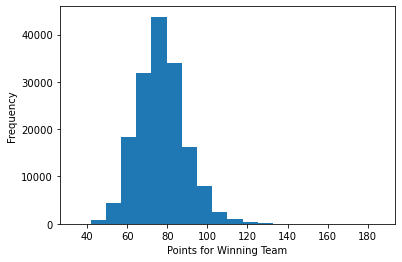

In [70]:
# 그래프 그리기
ax = df['WScore'].plot.hist(bins=20)
ax.set_xlabel('Points for Winning Team')
plt.show()

## CSV 파일로 데이터프레임 저장
to_csv() 함수를 사용하면 데이터프레임을 csv로 쉽게 저장할 수 있다. 아래 예는 위에서 사용한 결측치 있는 데이터프레임에서 결측치를 0으로 바꾸고 저장하는 예이다.

In [71]:
df1.fillna(0).to_csv('test.csv')
df2 = pd.read_csv('test.csv')
df2

,Unnamed: 0,Name,Age,Score
0,0,Alisa,26,89
1,1,Bobby,27,87
2,2,Cathrine,25,67
3,3,Madonna,24,55
4,4,Rocky,31,47
5,5,Sebastian,27,72
6,6,Jaqluine,25,76
7,7,Rahul,33,79
8,8,David,42,44
9,9,Andrew,32,92


위 예를 보면 첫 열에 Unnamed가 있는 것을 볼 수 있는데, 저장할 때 index가 함께 저장되고 읽어들일때는 새로운 인덱스를 자동으로 할당했기 때문이다. 이것을 해결하는 방법으로 첫째 저장할 때 인덱스를 제외하고 저장하거나, 둘째 읽어들일때 첫 열을 인덱스로 읽어들이는 방법이 있다.

In [72]:
#첫째 방법
df1.fillna(0).to_csv('test.csv', index=False) #인덱스를 저장하지 않음
df2 = pd.read_csv('test.csv')
df2

,Name,Age,Score
0,Alisa,26,89
1,Bobby,27,87
2,Cathrine,25,67
3,Madonna,24,55
4,Rocky,31,47
5,Sebastian,27,72
6,Jaqluine,25,76
7,Rahul,33,79
8,David,42,44
9,Andrew,32,92


In [73]:
#둘째 방법
df1.fillna(0).to_csv('test.csv')
df2 = pd.read_csv('test.csv', index_col=0) #첫 열을 인덱스로 저장
df2

,Name,Age,Score
0,Alisa,26,89
1,Bobby,27,87
2,Cathrine,25,67
3,Madonna,24,55
4,Rocky,31,47
5,Sebastian,27,72
6,Jaqluine,25,76
7,Rahul,33,79
8,David,42,44
9,Andrew,32,92


## 기타 유용한 함수들
* drop() - This function removes the column or row that you pass in (You also have the specify the axis).
* agg() - The aggregate function lets you compute summary statistics about each group
* apply() - Lets you apply a specific function to any/all elements in a Dataframe or Series
* get_dummies() - Helpful for turning categorical data into one hot vectors.
* drop_duplicates() - Lets you remove identical rows

# Numpy
Numpy는 Numerical Python의 줄임말로 고성능의 과학계산 컴퓨팅과 데이터 분석에 필요한 기본 패키지이다. 제공되는 기능은 다음과 같다.

* 빠르고 메모리를 효율적으로 사용하며 벡터 산술연산과 관련된 브로드캐스팅 기능을 제공하는 다차원 배열인 ndarray
* 반복문을 작성할 필요 없이 전체 데이터 배열에 대해 빠른 연산을 제공하는 표준 수학 함수
* 배열 데이터를 디스크에 쓰거나 읽을 수 있는 도구와 메모리에 올려진 파일을 사용하는 도구
* 선형대수, 난수 발생기, 푸리에 변환 기능

Numpy를 사용하기 위해서는 먼저 numpy 패키지를 import한다.

In [3]:
import numpy as np

## 다차원 배열(Arrays)
Numpy가 제공하는 ndarray(n-dimensional array)은 같은 종류의 데이터를 담을 수 있는 다차원 배열이며, 모든 원소는 같은 자료형이어야 한다. 모든 배열은 각 차원의 크기를 알려주는 shape라는 튜플과 배열에 저장된 자료형을 알려주는 type이라는 객체를 가진다. ndarray의 차원(dimension)은 rank라고 부른다.

In [4]:
# ndarray를 사용해보기 전에 비교를 위해 먼저 리스트를 실펴본다.
a = [1, 2, 3, 4, 5, 6]
print(a)
b = [[1, 2, 3], [4, 5, 6]] # 리스트로 2차원 행렬을 표현했을때의 모양
print(b)
c = [1, 'a', 3.5] # 리스트는 서로 다른 type의 데이터 저장이 가능
print(c)

[1, 2, 3, 4, 5, 6]
[[1, 2, 3], [4, 5, 6]]
[1, 'a', 3.5]


ndarray는 array 함수와 중첩된 리스트(list)를 이용하여 생성할 수 있으며, []를 이용하여 인덱싱(indexing)을 한다.

In [5]:
a = np.array([1, 2, 3])  # 1차원 배열 생성
print(type(a), a.shape, a[0], a[1], a[2])
a[0] = 5  # 배열의 한 원소를 변경
print(a)

<class 'numpy.ndarray'> (3,) 1 2 3
[5 2 3]


In [6]:
b = np.array([[1,2,3],[4,5,6]])  # 2차원 배열 생성
print(b)  # 2차원 배열의 모양을 확인

[[1 2 3]
 [4 5 6]]


In [7]:
print(b.shape)  #배열의 각 차원의 크기
print(b[0, 0], b[0, 1], b[1, 0])  #인덱싱 예제

(2, 3)
1 2 4


Numpy는 array 함수 외에도 배열을 생성하기 위한 다양한 방법을 제공한다.

In [10]:
a = np.zeros((2, 3))  # 값이 모두 0인 배열 생성, 매개변수는 원하는 shape
print(a)

[[0. 0. 0.]
 [0. 0. 0.]]


In [11]:
b = np.ones((3, 4))  # 값이 모두 1인 배열 생성
print(b)

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


In [12]:
c = np.full((2, 4), 7)  # 모든 원소가 원하는 값으로 초기화된 배열 생성
print(c)

[[7 7 7 7]
 [7 7 7 7]]


In [13]:
d = np.eye(4)  # 2x2의 단위행렬(identity matrix)을 생성
print(d)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [14]:
e = np.random.random((2,4))  # 무작위값으로 이루어진 배열 생성
print(e)

[[0.1309769  0.83179375 0.76157852 0.80239614]
 [0.311185   0.63665626 0.9232495  0.29315143]]


## 배열 인덱싱(Array indexing)
슬라이싱(Slicing): 파이썬 리스트와 유사하게 배열도 슬라이싱이 가능하다. ndarray는 다차원 배열이므로 각 차원에 대해 슬라이싱을 할 수 있다.

In [15]:
import numpy as np

# shape가 (3, 4)이고 아래와 같은 값을 갖는 2차원 배열을 생성
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# 아래와 같은 일부를 뽑아내고 싶다면?
# [[2 3]
#  [6 7]]
#        0열 1열 2열 3열
# 0행 [[ 1   2   3   4]
# 1행  [ 5   6   7   8]
# 2행  [ 9  10  11  12]]

b = a[:2, 1:3]
print(b)

[[2 3]
 [6 7]]


주의할 점 : 배열의 슬라이스를 잘라서 만든 배열은 원래의 배열과 값을 공유하므로 수정할 경우 원래의 배열도 값이 변경된다.

In [17]:
print(a[0, 1])  # 0행, 1열
b[0, 0] = 77  # b[0, 0] is the same piece of data as a[0, 1]
print(b)
print(a)

77
[[77  3]
 [ 6  7]]
[[ 1 77  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


만일 값을 복사해서 새로운 배열을 만들고 싶으면 copy() 함수를 사용

In [18]:
c = b.copy()
c[0, 0] = 55
print(c)
print(b)

[[55  3]
 [ 6  7]]
[[77  3]
 [ 6  7]]


인덱싱과 슬라이싱을 섞어서 쓸 수 있다 (정확히는 정수 인덱싱과 슬라이스 인덱싱)

In [19]:
# Create the following rank 2 array with shape (3, 4)
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print(a, a.shape)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]] (3, 4)


정수 인덱싱과 슬라이싱을 섞어서 쓰는 경우 차원이 감소할 수 있다. 슬라이싱만 쓰는 경우는 차원 유지

In [20]:
row_r1 = a[1, :]    # 차원이 감소되는 것에 주의  
print(row_r1, row_r1.shape)

[5 6 7 8] (4,)


In [21]:
row_r2 = a[1:2, :]  # 차원 유지됨
print(row_r2, row_r2.shape)

[[5 6 7 8]] (1, 4)


In [22]:
row_r3 = a[2, :]  # 차원 유지됨
print(row_r3, row_r3.shape)

[ 9 10 11 12] (4,)


In [23]:
# 컬럼만 잘라낼 때에도 마찬가지임
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print(col_r1, col_r1.shape)
print(col_r2, col_r2.shape)

[ 2  6 10] (3,)
[[ 2]
 [ 6]
 [10]] (3, 1)


정수 배열을 이용한 인덱싱: 슬라이싱을 사용하는 경우 결과는 항상 원래 배열의 서브 배열이 된다. 반면, 정수 배열을 이용하면 임의로 변경하는 것이 가능하다.

In [24]:
a = np.array([[1,2], [3, 4], [5, 6]])
print(a, a.shape)

# 정수 배열 인덱싱의 예.
# 반환된 배열의 shape는 (3,) 
print(a[[0, 1, 2], [0, 1, 0]])

# 위 방식은 아래 방식과 동일한 결과를 만들어 냄:
print(np.array([a[0, 0], a[1, 1], a[2, 0]]))

[[1 2]
 [3 4]
 [5 6]] (3, 2)
[1 4 5]
[1 4 5]


In [25]:
# 정수 배열 인덱싱을 할 때, 같은 요소를 가져오게 될 수도 있음
print(a[[0, 0], [1, 1]])

# 아래 예제와 동일
print(np.array([a[0, 1], a[0, 1]]))

[2 2]
[2 2]


정수 배열 인덱싱은 각각의 행/열에서 원하는 요소만 가져오고 싶을 때 유용하게 사용이 가능

In [26]:
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
print(a)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [27]:
# np.arange는 range와는 달리 ndarray 형태로 모든 값을 생성
print(np.arange(4))
print(range(4))

[0 1 2 3]
range(0, 4)


In [28]:
# 정수 배열 선언
b = np.array([0, 2, 0, 1])

# b의 각 행에서 위 배열에 해당하는 열의 값을 가져오고 싶다면?
print(a[np.arange(4), b])  # (0,0), (1,2), (2,0), (3,1)

[ 1  6  7 11]


In [29]:
# b의 각 행에서 위 배열에 해당하는 열의 값에만 10을 더하고 싶다면?
a[np.arange(4), b] += 10
print(a)

[[11  2  3]
 [ 4  5 16]
 [17  8  9]
 [10 21 12]]


불리안 배열 인덱싱: 불리안 배열을 이용하면 배열에서 원하는 요소들만 추출이 가능하다. 일반적으로 특정 조건을 만족하는 요소들만 골라내고자 하는 경우에 자주 사용된다.

In [30]:
bb = np.array([1, 2, 3, 4, 5, 6])

# ndarray 중 벡터에 대한 비교연산자 적용 결과
bb > 3

array([False, False, False,  True,  True,  True])

In [31]:
# 벡터에 대한 불리안 인덱싱 결과

bb[bb > 3] # bb 값 중에서 3보다 큰 값만 반환 

array([4, 5, 6])

In [32]:
# 행렬에 대한 불리안 인덱싱 결과 확인
a = np.array([[1,2], [3, 4], [5, 6]])

bool_idx = (a > 2)  # 배열의 개별적인 요소에 대해서 2보다 큰지를 True/False 배열로 반환

print(bool_idx)

[[False False]
 [ True  True]
 [ True  True]]


In [33]:
# 불리안 배열의 값이 true인 요소들만 반환
print(a[bool_idx])

# 아래와 같이 줄여서 사용 가능:
print(a[a > 2])

[3 4 5 6]
[3 4 5 6]


## 데이터 타입
Numpy의 ndarray는 모두 같은 타입의 요소들로 이루어진다. 다양한 데이터 타입이 제공되며, 지정하지 않는 경우 Numpy는 타입을 자동으로 선택한다. 아래와 같이 데이터 타입을 명시적으로 선언하는 것도 가능하다:

In [34]:
x = np.array([1, 2])  # 자동으로 타입 선택
y = np.array([1.0, 2.0])  # 자동으로 타입 선택
z = np.array([1, 2], dtype=np.int64)  # 명시적으로 타입을 지정

print(x.dtype, y.dtype, z.dtype)

int32 float64 int64


In [35]:
z = np.array([1, 2], dtype=np.float32) #값은 정수인데 타입은 실수로 한 경우
z

array([1., 2.], dtype=float32)

## 배열 연산
배열에 대한 수학 연산은 기본적으로 요소단위(elementwise)로 이루어지며, 연산자와 함수 둘 다 사용이 가능하다:

In [36]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)
print(x)
print(y)

[[1. 2.]
 [3. 4.]]
[[5. 6.]
 [7. 8.]]


In [37]:
# 요소합(elementwise sum), 결과로 ndarray를 생성한다
print(x + y)
print(np.add(x, y))

[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]


In [38]:
# 요소차(Elementwise difference)
print(x - y)
print(np.subtract(x, y))

[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]


In [39]:
# 요소곱(Elementwise product)
print(x * y)
print(np.multiply(x, y))

[[ 5. 12.]
 [21. 32.]]
[[ 5. 12.]
 [21. 32.]]


In [41]:
# 요소 나눗셈(Elementwise division)
print(x / y)
print(np.divide(x, y))

[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]


In [42]:
# Elementwise square root
print(np.sqrt(x)) #sqrt가 각 요소에 적용됨

[[1.         1.41421356]
 [1.73205081 2.        ]]


In [43]:
import math
a = [1, 2, 3, 4]

math.sqrt(a) #sqrt()가 리스트에도 작동하는지 확인

TypeError: must be real number, not list

벡터의 내적(inner product)은 dot 함수를 사용한다. dot 는 numpy 함수와 ndarray의 메소드 두 방식으로 사용이 가능하다.

In [44]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11,12])

print(x, x.shape)
print(y, y.shape)
print(v, v.shape)
print(w, w.shape)

[[1 2]
 [3 4]] (2, 2)
[[5 6]
 [7 8]] (2, 2)
[ 9 10] (2,)
[11 12] (2,)


In [45]:
# 벡터 내적(Inner product)
print(v.dot(w))
print(np.dot(v, w))

219
219


In [46]:
# 행렬과 벡터 간 곱셈(matrix / vector product)
print(x.dot(v))
print(np.dot(x, v))

[29 67]
[29 67]


In [47]:
# 행렬 곱셈(Matrix multiplication / product)
print(x.dot(y))
print(np.dot(x, y))

[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


Numpy는 유용한 함수들을 제공한다. 그 중 하나가 sum으로 사용법은 아래와 같다

In [48]:
x = np.array([[1,2],[3,4]])
print(x)

print(np.sum(x))  # 모든 요소의 합 "10"
print(np.sum(x, axis=0))  # 열(column)의 합을 계산 "[4 6]"
print(np.sum(x, axis=1))  # 행(row)의 합을 계산; prints "[3 7]"

[[1 2]
 [3 4]]
10
[4 6]
[3 7]


행렬연산에서 중요한 연산 중 하나는 전치행렬(transposed matrix)를 구하는 것이다. 아래와 같이 Numpy의 T 메소드를 이용해서 구한다.

In [49]:
x = np.array([[1,2,3],[4,5,6]])
print(x)
print(x.T)  # 전치행렬

[[1 2 3]
 [4 5 6]]
[[1 4]
 [2 5]
 [3 6]]


In [50]:
v = np.array([[1,2,3]])
print(v)
print(v.T)  # 전치행렬

[[1 2 3]]
[[1]
 [2]
 [3]]


## 브로드캐스팅(Broadcasting)
브로드캐스팅은 크기가 서로 다른 배열에 대해 연산을 하고자 하는 경우에 사용되는 강력한 메커니즘이다. 아래 예는 브로드캐스팅의 개념과 예제를 잘 보여준다:

In [51]:
# 벡터 v 를 행렬 x의 모든 행에 더하고자 함,
# 그 결과는 행렬 y에 저장
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
print('x =\n', x)
v = np.array([1, 0, 1])
y = np.empty_like(x)   # x와 동일한 shape를 가진 빈 행렬을 생성

# 반복문을 이용해 x의 각 행에 v를 더함
for i in range(4):
    y[i, :] = x[i, :] + v

print('y =\n', y)

x =
 [[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
y =
 [[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


작동은 하지만 행렬 x가 커지면 느려지고, 코딩도 귀찮다. 다음으로 생각할 수 있는 방법은 벡터 v를 반복해서 x와 같은 크기로 만들고 vv에 저장한 다음에 x와 vv의 요소합 (elementwise sum)을 하는 것이다.

In [52]:
vv = np.tile(v, (4, 1))  # x 행의 수만큼 v를 반복해서 vv를 생성
print(vv)

[[1 0 1]
 [1 0 1]
 [1 0 1]
 [1 0 1]]


In [53]:
y = x + vv  # x와 vv를 요소합
print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


Numpy가 제공하는 브로드캐스팅(broadcasting)을 이용하면 쉽게 구현이 가능

In [54]:
import numpy as np

x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = x + v  # x와 v의 shape이 다르기 때문에 자동으로 브로드캐스팅이 작동
print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


y = x + v에서 x의 shape은 (4, 3) 이고 v의 shape은 (3,) 이므로 브로드캐스팅이 작동, v의 shape가 (4, 3)이 되도록 v를 복사한 후에, 요소합을 구하게 된다.

브로드캐스팅의 동작원칙은 다음과 같다:
1. 만일 두 배열의 차수가 다르면 차수가 적은 배열을 늘려서 shape를 맞춰서 연산을 한다.
2. 이 때 두 배열이 한 차원에서 크기가 동일하거나 다른 쪽의 크기가 1이면 호환가능(compatible)하다.
3. 두 배열이 모든 차원에서 호환가능하면 브로드캐스팅이 된다.
4. 한 배열의 어떤 차원의 크기가 1이고 다른 배열의 같은 차원의 크기가 1보다 크면 큰 쪽에 맞춰서 복사된다.

In [55]:
v = np.array([1,2,3])  # v has shape (3,)
w = np.array([4,5])    # w has shape (2,)
# 위의 경우, v와 w의 shape이 다르므로 요소곱을 하는 경우 에러 발생
# 먼저 v를 열로 바꿔서 shape을 (3, 1)로 만든 후에 브로드캐스팅을 적용하면 v와 w가 (3, 2)로 확장되고 그 다음 요소곱을 실행
print(np.reshape(v, (3, 1)) * w)

[[ 4  5]
 [ 8 10]
 [12 15]]


In [56]:
# 벡터를 행렬의 각 행에 더하고자 하는 경우
x = np.array([[1,2,3], [4,5,6]])
print('x =\n', x)
# x는 (2, 3)이고 v는 (3,)이므로 v를 (2, 3)으로 브로드캐스트

print('result =\n', x + v)

x =
 [[1 2 3]
 [4 5 6]]
result =
 [[2 4 6]
 [5 7 9]]


In [57]:
# x의 각 행에 w를 더하고 싶다면?
# x는 (2, 3), w는 크기가 2인 벡터이므로 차원이 맞지 않음
# w를 reshape해서 (2, 1)로 바꾸면 브로드캐스팅이 가능
print(x + np.reshape(w, (2, 1)))

[[ 5  6  7]
 [ 9 10 11]]


In [58]:
# x 행렬에 상수 곱을 하고 싶을 때
# Numpy는 스칼라를 shape ()로 취급;
# 따라서 x에 맞춰 스칼라를 shape (2, 3)으로 브로드캐스팅이 가능
print(x * 2)

[[ 2  4  6]
 [ 8 10 12]]


브로드캐스팅은 코드를 간략하게 할 뿐 아니라 속도도 향상되므로 가능하면 항상 사용하는 것이 바람직하다.